In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Combined_QB.csv')  # Replace with your actual data
metric = 'Current_PFF'  # Specify the metric you want to predict

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'Team', 'Year', 'Position', 'Value_cap_space',
       'Value_draft_data', 'Previous_AV', 'Current_AV', 'Previous_PFF',
       'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       'weighted_avg_accuracy_percent', 'weighted_avg_aimed_passes',
       'weighted_avg_attempts', 'weighted_avg_avg_depth_of_target',
       'weighted_avg_avg_time_to_throw', 'weighted_avg_bats',
       'weighted_avg_big_time_throws', 'weighted_avg_btt_rate',
       'weighted_avg_completion_percent', 'weighted_avg_completions',
       'weighted_avg_declined_penalties', 'weighted_avg_def_gen_pressures',
       'weighted_avg_drop_rate', 'weighted_avg_dropbacks',
       'weighted_avg_drops', 'weighted_avg_first_downs',
       'weighted_avg_franchise_id', 'weighted_avg_grades_hands_fumble',
       'weighted_avg_grades_pass', 'weighted_avg_grades_run',
       'weighted_avg_hit_as_threw', 'weighted_avg_interceptions',
       'weighted_avg_passing_snaps', 'weighted_avg_penalties',
       'w

In [4]:
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns=columns_to_drop)


In [5]:
df = df.sort_values(by=['Team', 'Year'])

# Display the sorted data
print(df.head())


      Team  Year Position  Value_cap_space  Value_draft_data  Previous_AV  \
17   49ers  2019       QB        11.439957         24.060673         11.0   
50   49ers  2020       QB         0.610494         34.317120         15.0   
70   49ers  2021       QB        17.863014        528.923536         11.0   
123  49ers  2022       QB         6.959654        412.212335         15.0   
12   Bears  2019       QB         7.396387        434.985593         15.0   

     Current_AV  Previous_PFF  Current_PFF Total DVOA  ...  \
17         15.0     64.331406    77.900000     27.90%  ...   
50         11.0     77.900000    61.558114      5.40%  ...   
70         15.0     61.558114    72.551515     19.50%  ...   
123        17.0     72.551515    71.909475     27.60%  ...   
12          9.0     62.198104    64.653902     -2.10%  ...   

     Previous_sack_percent  Previous_sacks  Previous_scrambles  \
17                8.019063       16.592188            4.965625   
50                6.800000      

In [6]:
team_data = df.groupby('Team')
print(team_data.head)


<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x306d12e10>>


In [7]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['weighted_avg_qb_rating', 'Current_PFF', 'weighted_avg_grades_pass', 'weighted_avg_big_time_throws', 'Value_cap_space', 'weighted_avg_sack_percent', 
                'weighted_avg_twp_rate', 'Current_AV']]
  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Net EPA']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")


Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [8]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

[[[102.          77.9         75.7         13.          11.43995749
     6.8          3.4         15.        ]
  [ 90.24605873  61.55811437  60.39690881   7.38485317   0.61049445
     6.34945904   4.5137558   11.        ]
  [ 98.48080808  72.55151515  71.13686869   8.9040404   17.8630137
     5.69292929   4.5530303   15.        ]]

 [[ 84.07037572  64.65390173  64.42196532  18.1734104    7.39638682
     6.93106936   3.44566474   9.        ]
  [ 86.73453237  64.11294964  62.75971223  13.45323741   8.06760848
     5.36115108   4.44748201  10.        ]
  [ 76.22885714  65.11014286  61.79014286  11.71285714   6.39452055
     8.79271429   3.56214286  10.        ]]

 [[ 75.65215577  60.80876217  60.30166898  15.24617524   9.24017003
     7.04255911   4.6108484    8.        ]
  [ 85.51304985  69.71950147  68.8627566   11.97653959   0.61049445
     7.33343109   3.53695015  10.        ]
  [106.62876304  88.60789866  88.10163934  32.80923994   5.34794521
     8.71892697   2.4         15.        

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [10]:
# Define the input layer
inputs = Input(shape=(3, 8))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)


In [11]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [12]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0917
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0615 
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0760 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0749 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.0671


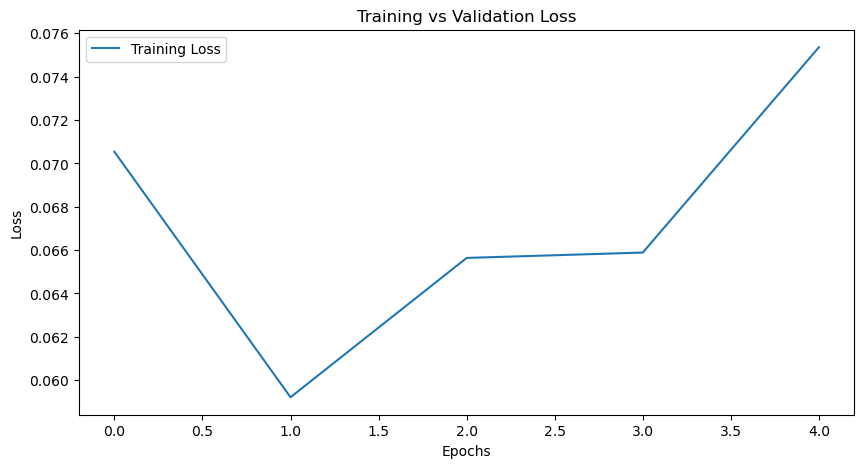

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
R² Score: 0.0651


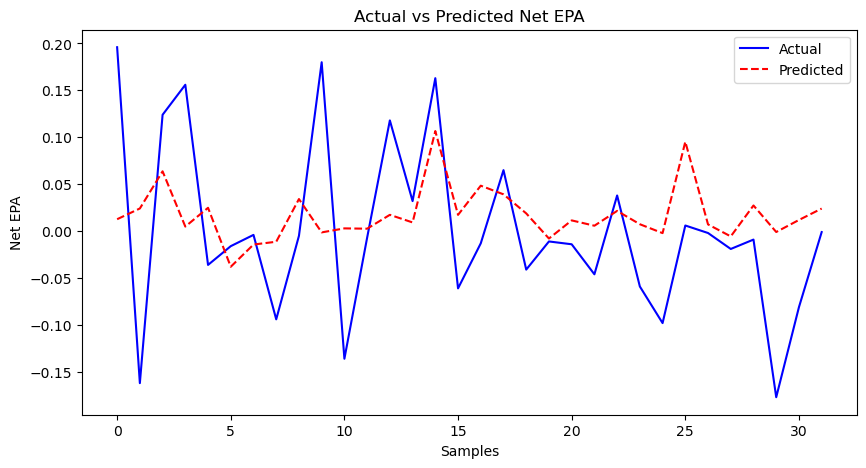

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0586 
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0448 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0450 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0223 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0165 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0199 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0268 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0226 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0237
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0170 


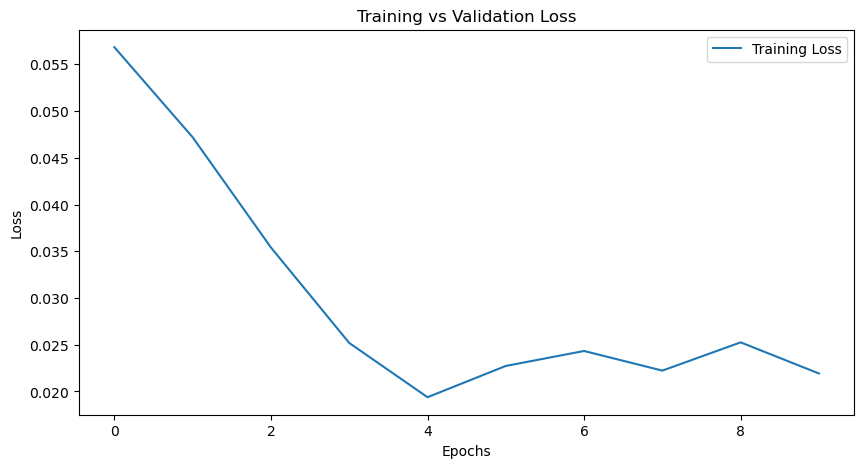

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
R² Score: 0.1544


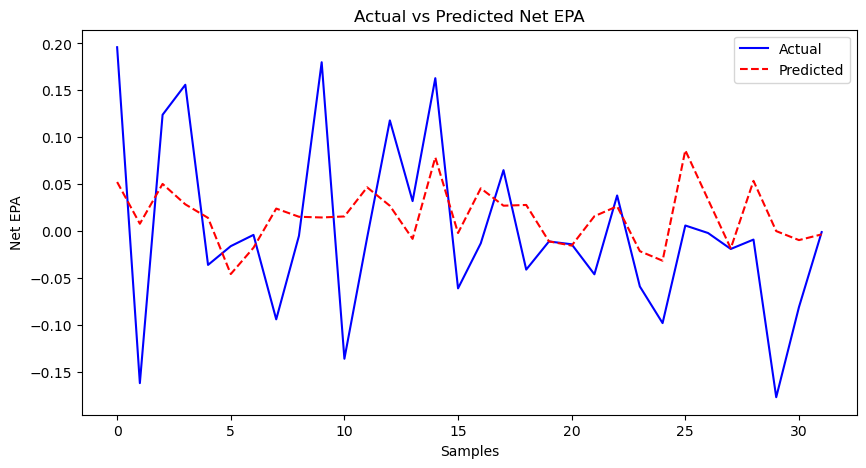

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0276 
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0218 
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0173 
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.0170
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0231 
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.0140
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0113 
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0190 
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0197 
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.0134
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0147 
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0154 
Epoch 13/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0115 
Epoch 14/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0133
Epoch 15/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0109


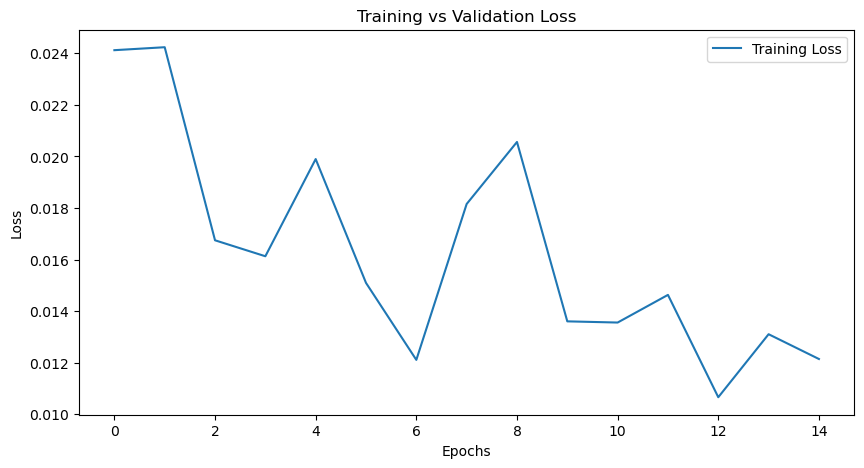

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R² Score: 0.2090


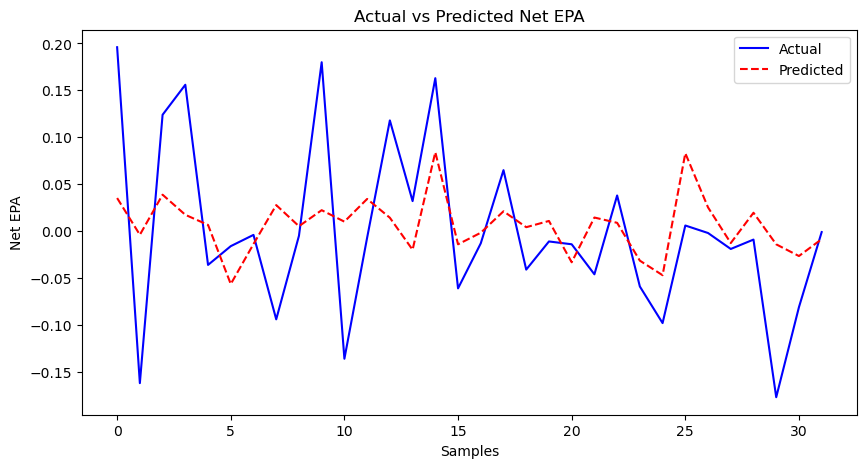

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0101 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0215 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0088 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0109
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 0.0103
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0109 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.0113
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0114 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0087 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0117
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 0.0112
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.0141
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0091
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━━

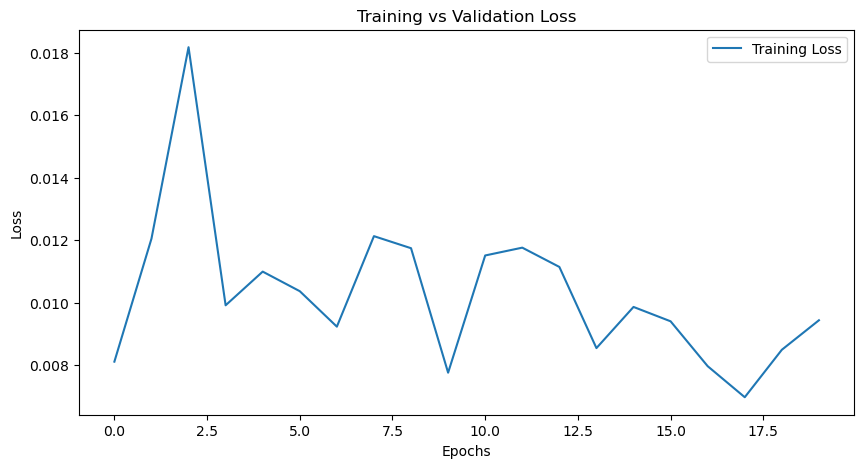

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R² Score: 0.2257


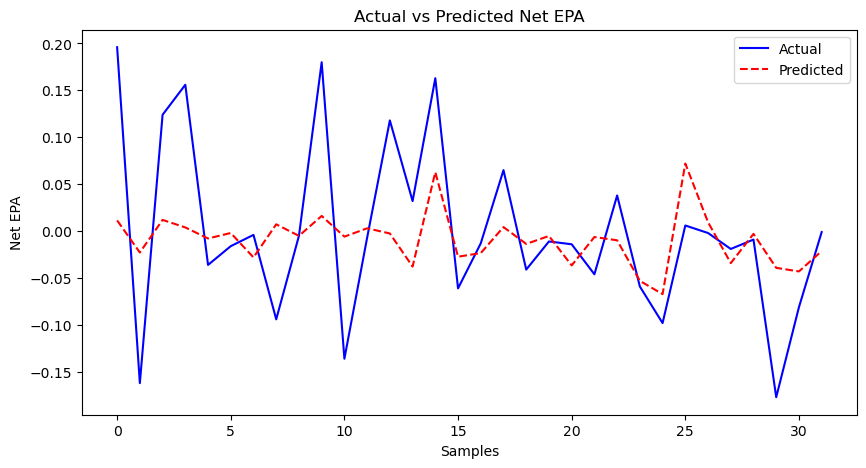

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071 
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076 
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0097
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0092
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0094
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0098 
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060 
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0125
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0094 
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0058 
Epoch 13/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0086 
Epoch 14/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.0053
Epoch 15/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073 
Epoch 16/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 

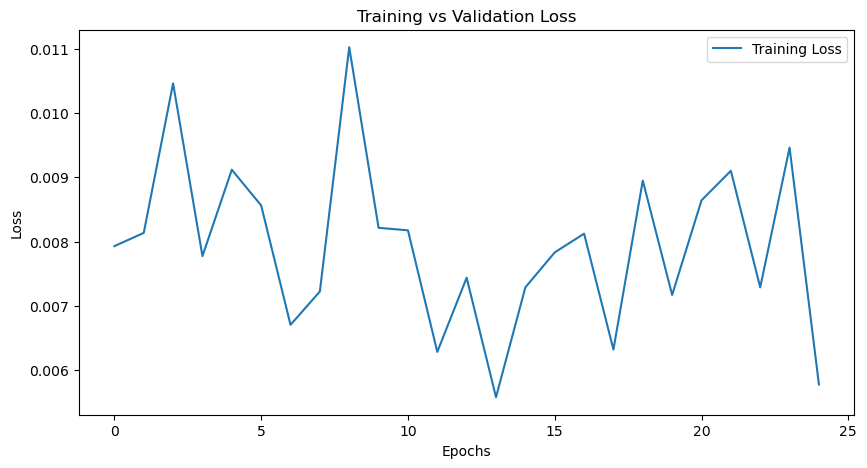

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.2866


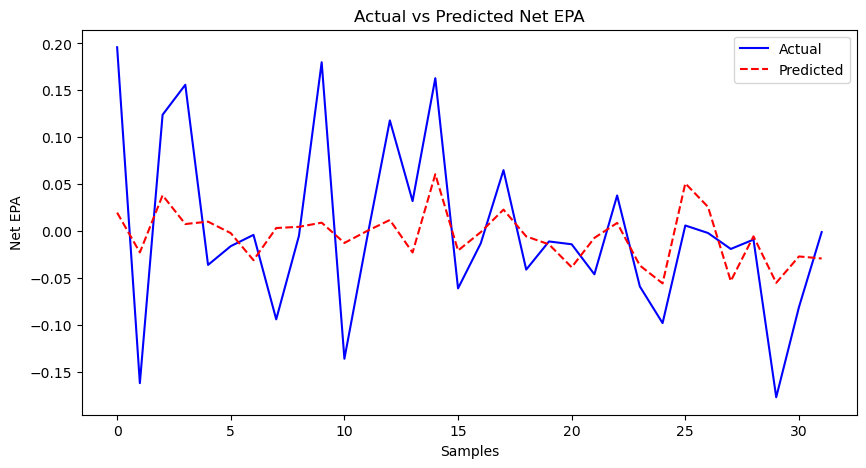

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079 
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074 
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0062 
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.0059
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.0068
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 0.0068
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0094 
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0098 
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.0057
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.0063
Epoch 13/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.0095
Epoch 14/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0072
Epoch 15/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.0078
Epoch 16/30
4/4 ━━━━━━━━━━━━━━

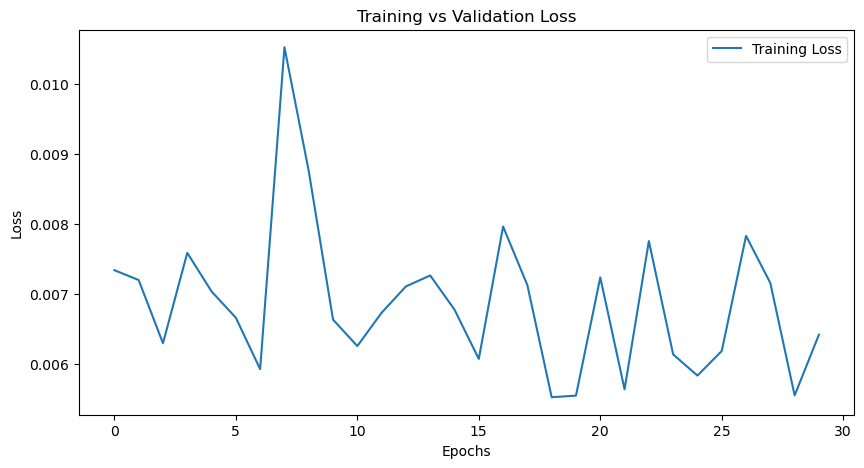

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.3306


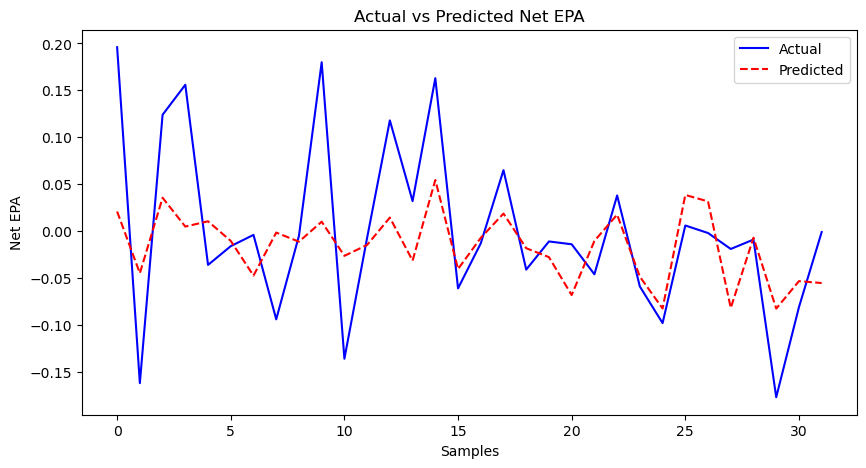

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072 
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0059 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0040 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0064 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0069
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0043 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.0063
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0

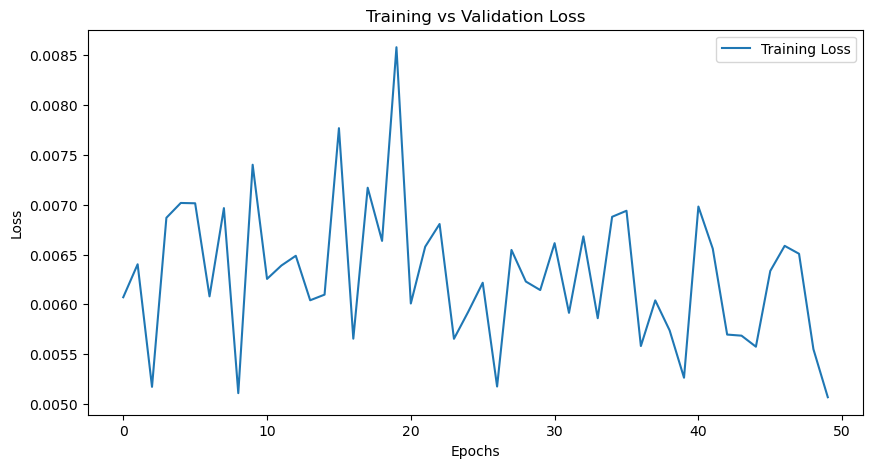

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.4030


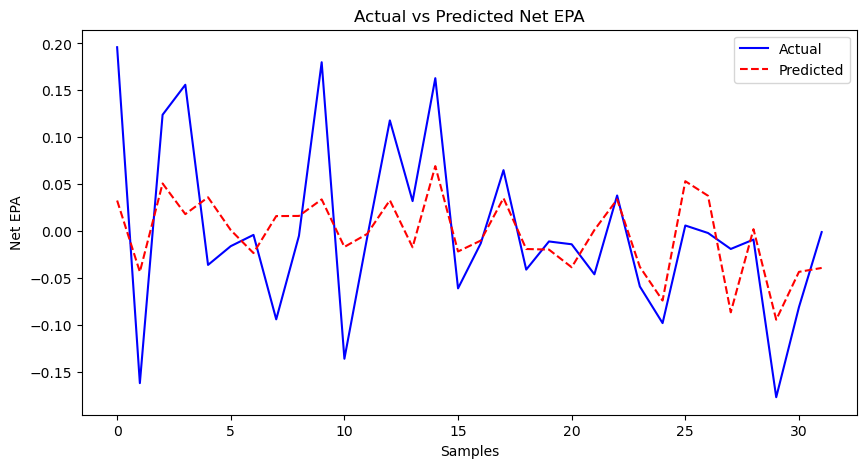

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0058 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0077 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0085 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 0.0039
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.0064
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0053
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.0063
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.0044
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 0.0058
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0053
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.0064
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0050 
Epoch 16/100
4/4

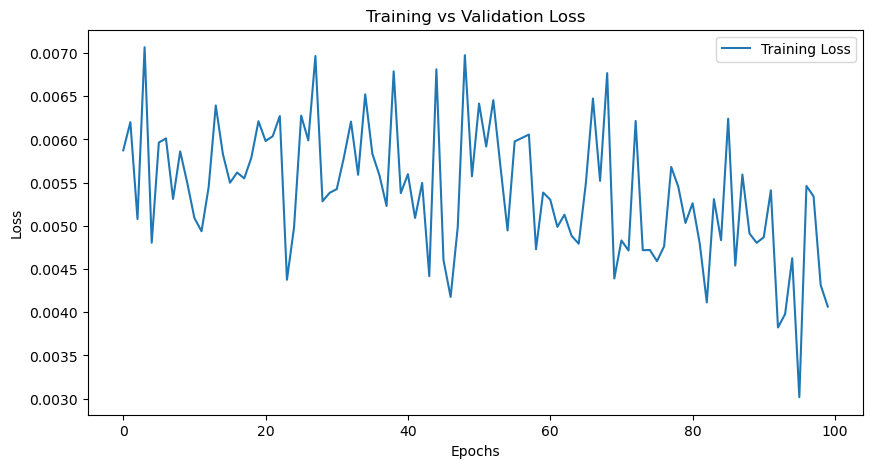

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R² Score: 0.5028


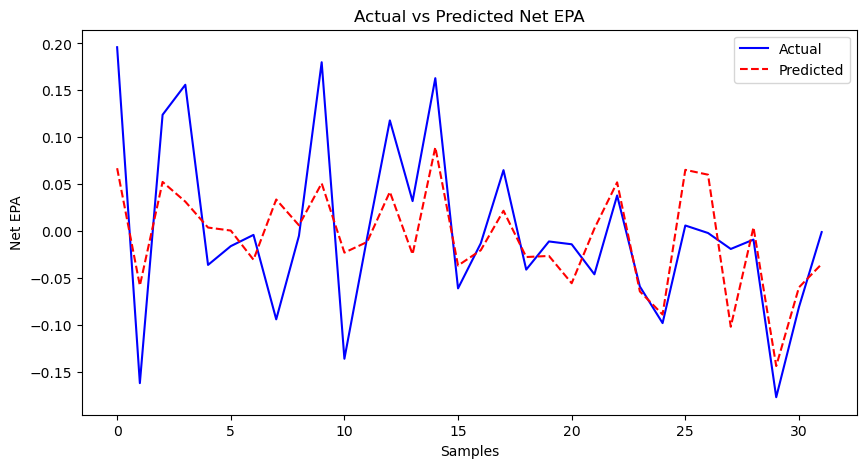

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0048 
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 0.0030
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 0.0035
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.0041
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.0059
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0054 
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 0.0040
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.0061
Epoch 13/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0047    
Epoch 14/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0040
Epoch 15/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 0.0057
Epoch 16/250

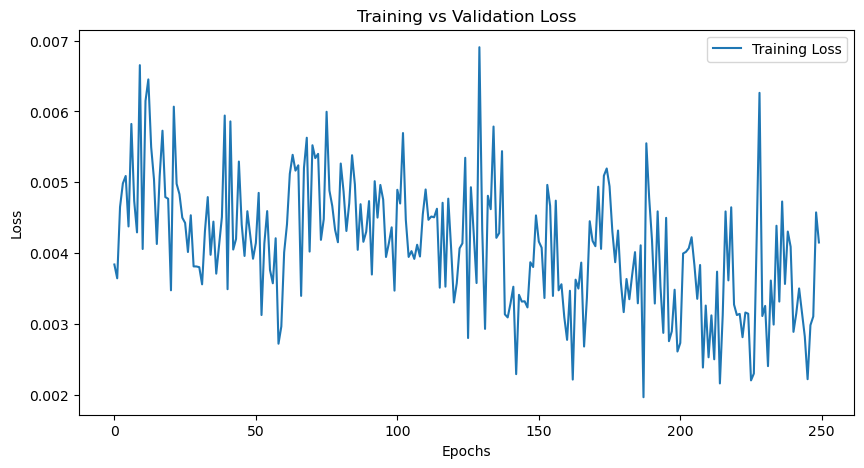

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R² Score: 0.7288


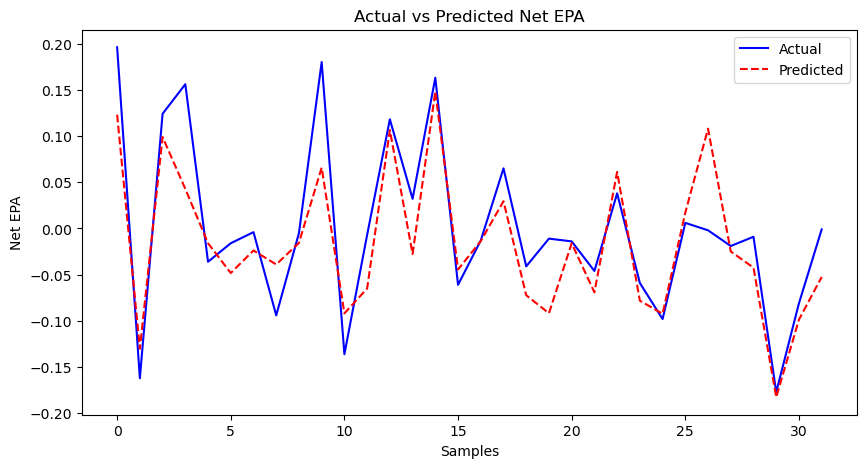

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034 
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.0029
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.0033
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018     
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0028
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 0.0028
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0047 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0028
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 0.0034
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 0.0034
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.0025
Epoch 16/500
4/

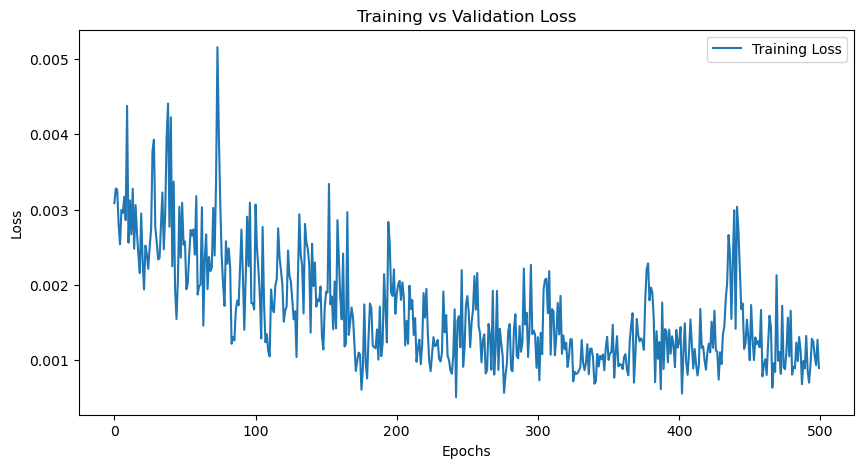

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R² Score: 0.9256


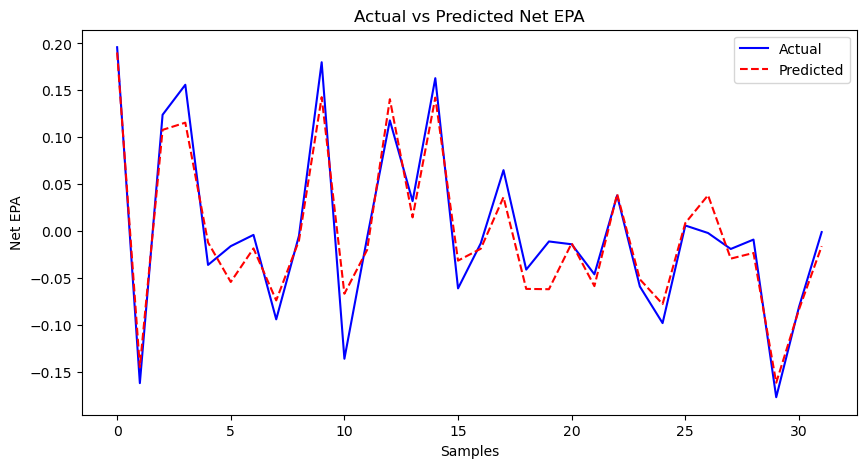

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.1262e-04 
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016     
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.0010  
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 9.5820e-04
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.0011
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.0014
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.0013   
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 9.6932e-04
Epoch 13/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.0016
Epoch 14/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 15/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 892

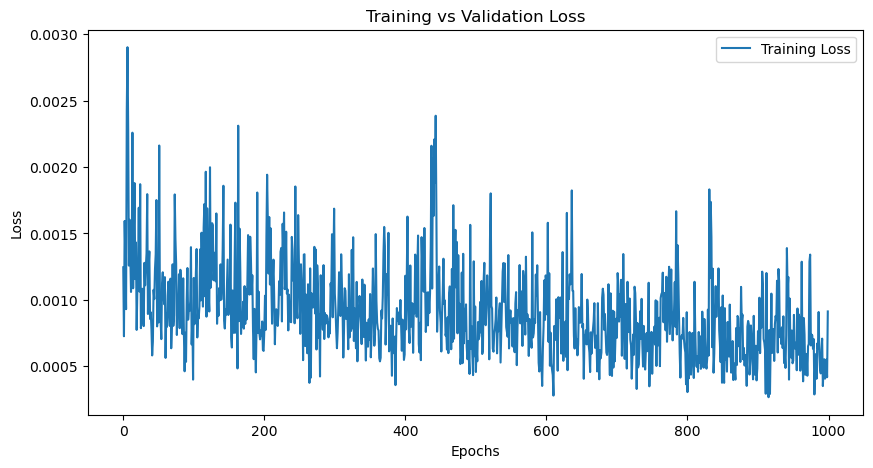

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R² Score: 0.9916


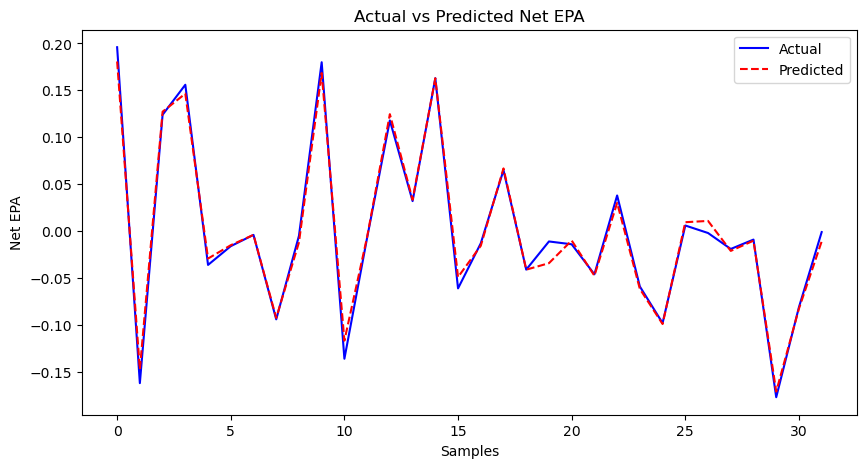

In [14]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [5, 10, 15, 20, 25, 30, 50, 100, 250, 500, 1000]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
    plt.title('Actual vs Predicted Net EPA')
    plt.xlabel('Samples')
    plt.ylabel('Net EPA')
    plt.legend()
    plt.show()



